# Homework Set - I

### Section One. Finding Genomic information Online

Your colleague, Sarah, has just finished an extensive karyotyping study across samples from many different types of human cancers. She specifically looked for regions of the genome that have a statistically significant rate of chromosomal aberrations (including inversions, deletions, and translocations). She has asked you to help her analyze her results, starting with a region she identified on chromosome 10, ranging from base pairs 87,800,000 to 87,980,000 using NCBI build 38 (hg38). Use UCSC Genome Browser and/or other public databases to view information about known genes in this region. Please exclude pseudogenes. [Hint: you can click the gene region and check the basic information of the genes to determine if a gene is a pseudogene]. 

**Q1.** What are the RefSeq genes in this region?

In [5]:
ATAD1 (ATPase family AAA domain-containing protein 1)
KLLN (Killin, p53-regulated DNA replication inhibitor)
PTEN (Phosphatase and tensin homolog)

ERROR: Error in parse(text = x, srcfile = src): <text>:1:15: unexpected symbol
1: ATAD1 (ATPase family
                  ^


**Q2.1.** Sarah collected additional evidence which suggests the gene of interest to be an enzyme. With this added information, hypothesize which gene you think is the most likely candidate to be related to human cancers, and provide evidence from at least 2 different public databases. Be sure to include the URL to each database entry on which you base your answer.
[Hint: There is Phenotype and Disease Associations category on UCSC genome browser.]


**Q2.2.** Sarah want to conduct a knockout experiment to further study the gene. Instead of knocking out the whole gene, she wants to knock out *a relevant structural domain* of the protein that is important to its function. You remember that UniProt may contain relevant information for protein strctures. Based on the information from the database, which structural domain of the protein is relevant to its function in supressing tumors? [Hint: You should search the gene symbol in the database, then go to the "Family & domains" section of the protein.]

### Section Two: Base R

**For the following questions, write your code or the text answer in the cells indicated. Do not use tidyverse or ggplot for any of the questions in this section.**

**Q3.** Create a vector with elements 5, 6, 7, 8, 9, 10, ..., 99, 100 and assign it to a variable `vec1`. Create another vector with elements 5, 6, 7, 8, 9, 10 and assign it to a variable `vec2`.

In [1]:
# Create vec1 with elements from 5 to 100
vec1 <- 5:100

# Create vec2 with elements from 5 to 10
vec2 <- 5:10


**Q4.** Multiply the contents of **all elements** of `vec2` by 10, and assign the updated values to `vec3`. Print the third element of the updated vector.

In [2]:
# Multiply all elements of vec2 by 10 and assign to vec3
vec3 <- vec2 * 10

# Print the third element of vec3
print(vec3[3])

[1] 70


You can see that each element in `vec2` is multipled by 10 with this command. Vectorized calculation is a very useful feature of R. With this feature, we don't need to write a "for" loop to do the same calculation, which can take longer to complete.

A robust version of the mean is trimmed mean. That is, trim (remove) some small values and large values from the vector before calculating the mean. 

In R, the trimmed mean can be calculated with the `trim` parameter. 

**Q5.** Using the help page of `mean()`, caculate the mean value of `vec3` with `trim=0.1`, and save the trimmed mean in a new variable named `trim_mean`.

In [3]:
# Calculate the trimmed mean of vec3 with trim = 0.1
trim_mean <- mean(vec3, trim = 0.1)

# Print the trimmed mean
print(trim_mean)


[1] 75


**Q6.1.** Next, we will use a recently publised single cell RNA-Seq dataset. Load `single_cell_rnaseq_hw1.txt` into a variable named `scdata`, using the function `read.table`. 
Note: 
1. we have provided you this file in your problem set folder; 
2. this file has the first line as the header; 

In [6]:
# Load the single cell RNA-Seq dataset into scdata
scdata <- read.table("single_cell_rnaseq_hw1.txt", header = TRUE)

# View the first few rows of the dataset to confirm it loaded correctly
head(scdata)

Sub1,Scg2,Aldoa
29,0,62
11,1,33
14,1,20
19,4,51
17,3,27
34,13,31


**Q6.2.** Write code to check the data type or class of `scdata`, is it a `data.frame` or a `matrix`? Write the code to check data type in the fix box and the answer in the second box. 

In [9]:
# Check the data type or class of scdata
class(scdata)

[1] "data.frame"

**Q7.** Use `[]` to output the first 5 rows and all columns of `scdata`. Note that the columns are genes and the rows are samples.


In [10]:
# Output the first 5 rows and all columns of scdata
scdata[1:5, ]

Sub1,Scg2,Aldoa
29,0,62
11,1,33
14,1,20
19,4,51
17,3,27


**Q7.2.** To access columns in a `matrix` or a `data.frame`, we can use the position index \(i.e., `2` represents the second column\), or the name index, if the column name exists. For a `data.frame`, we can also use dollar sign to access a named column. Please provide three ways to show the first five rows of the `Aldoa` gene. Make sure you get the same results. In your opinion, which approach is not ideal because of poor readability? 


In [11]:
# First five rows of the second column (assuming 'Aldoa' is the second column)
scdata[1:5, 2]
# First five rows of the 'Aldoa' column using the column name
scdata[1:5, "Aldoa"]
# First five rows of the 'Aldoa' column using the dollar sign
scdata$Aldoa[1:5]

[1] 0 1 1 4 3

[1] 62 33 20 51 27

[1] 62 33 20 51 27

In [13]:
The approach using the position index (scdata[1:5, 2]) is not ideal for readability. It relies on knowing the exact position of the column, which can change if the dataset is modified or updated. The name index (scdata[1:5, "Aldoa"]) and dollar sign (scdata$Aldoa[1:5]) are more readable because they use the actual column name, making the code easier to understand and maintain.

ERROR: Error in parse(text = x, srcfile = src): <text>:1:5: unexpected symbol
1: The approach
        ^


**Q8.** Use `[]` and `<-` to change the value of the object in the second row, second column in scdata to 333. Use `[]` to output the first 5 rows and all columns again.

In [14]:
# Change the value in the second row, second column to 333
scdata[2, 2] <- 333

# Output the first 5 rows and all columns
scdata[1:5, ]


Sub1,Scg2,Aldoa
29,0,62
11,333,33
14,1,20
19,4,51
17,3,27


**Q9.** Note the above action is dangerous! We cannot retrieve the original values after changing the object \(and save it under the same object\). Fortunately, we have not modified the raw file itself. So we will reload the data. Reload the file `single_cell_rnaseq_hw1.txt` into the `scdata` variable and output the first 5 rows for a second time. Is the value in the second row, second column 333, or the original value? Why? Write your code in the first cell and answer in the second cell.


In [15]:
# Reload the single cell RNA-Seq dataset into scdata
scdata <- read.table("single_cell_rnaseq_hw1.txt", header = TRUE)

# Output the first 5 rows
scdata[1:5, ]


Sub1,Scg2,Aldoa
29,0,62
11,1,33
14,1,20
19,4,51
17,3,27


**Q10.** Calculate the summary statistics for each gene. What are the mean values for gene `Sub1` and `Aldoa` from the summary statistics? Write down the code in the first cell and your answers in the second cell.

In [16]:
# Calculate summary statistics for each gene
summary_stats <- summary(scdata)

# Display the summary statistics
print(summary_stats)

# Extract mean values for Sub1 and Aldoa
mean_Sub1 <- mean(scdata$Sub1)
mean_Aldoa <- mean(scdata$Aldoa)

# Print the mean values
mean_Sub1
mean_Aldoa


      Sub1            Scg2          Aldoa      
 Min.   : 7.00   Min.   : 0.0   Min.   : 4.00  
 1st Qu.:15.00   1st Qu.: 2.0   1st Qu.:20.00  
 Median :28.50   Median : 3.5   Median :31.00  
 Mean   :26.52   Mean   : 6.3   Mean   :32.33  
 3rd Qu.:35.25   3rd Qu.: 8.0   3rd Qu.:45.00  
 Max.   :52.00   Max.   :32.0   Max.   :82.00  


[1] 26.525

[1] 32.325

**Q11.1.** If we want to use t-test to test the statistical difference of `Sub1` and `Scg2`, what is the null hypothesis and alternative hypothesis in this case? Write your answer in the following cell.

**Q11.2.** Perform the t-test to compare the mean values of `Sub1` and `Scg2`. Save the output to a variable called `t_result`  

In [17]:
# Perform the t-test to compare the mean values of Sub1 and Scg2
t_result <- t.test(scdata$Sub1, scdata$Scg2)

# Print the t-test result
print(t_result)


	Welch Two Sample t-test

data:  scdata$Sub1 and scdata$Scg2
t = 9.4614, df = 66.716, p-value = 5.987e-14
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 15.95793 24.49207
sample estimates:
mean of x mean of y 
   26.525     6.300 



**Q11.3.** Ouput the t-statistic and p-value from the above test. What is your conclusion?

In [ ]:
T-statistic: 9.4614
P-value: 5.987e-14

**Q12.** Plot the expression level of `Sub1` and `Scg2` using a scatter plot (put `Sub1` on y-axis and `Scg2` on x-axis), using the `plot()` function in base R. 
Note: please use base R functions for questions **Q12** to **Q15**.

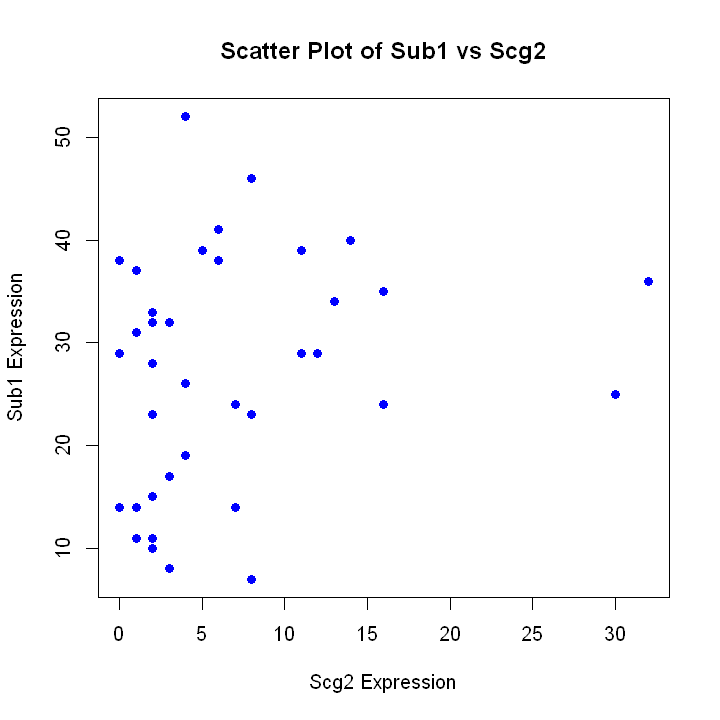

In [19]:
# Set plotting options for size
options(repr.plot.width=6, repr.plot.height=6)

# Scatter plot with Sub1 on the y-axis and Scg2 on the x-axis
plot(scdata$Scg2, scdata$Sub1, 
     xlab = "Scg2 Expression", 
     ylab = "Sub1 Expression", 
     main = "Scatter Plot of Sub1 vs Scg2", 
     pch = 16, # Use filled circles for points
     col = "blue") # Set point color to blue

**Q13.1.** Perform a simple linear regression between `Sub1` and `Scg2`; consider `Sub1` as the response variable and `Scg2` as the explanatory variable. Save the linear regression results into a variable named `linear_regression_result`

In [20]:
# Perform linear regression with Sub1 as the response and Scg2 as the explanatory variable
linear_regression_result <- lm(Sub1 ~ Scg2, data = scdata)

# Print the linear regression result
summary(linear_regression_result)



Call:
lm(formula = Sub1 ~ Scg2, data = scdata)

Residuals:
     Min       1Q   Median       3Q      Max 
-20.1753  -9.9389   0.3247   7.3699  26.3548 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  24.1151     2.3362  10.322  1.4e-12 ***
Scg2          0.3825     0.2434   1.572    0.124    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 11.15 on 38 degrees of freedom
Multiple R-squared:  0.06105,	Adjusted R-squared:  0.03634 
F-statistic: 2.471 on 1 and 38 DF,  p-value: 0.1243


**Q13.2.** Plot the regression line on the previous scatter plot.

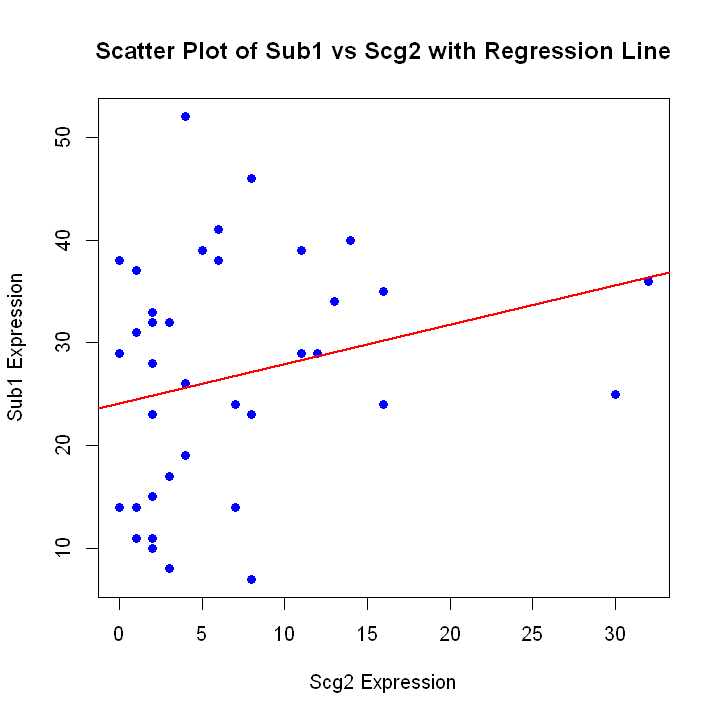

In [21]:
# Set plotting options for size
options(repr.plot.width=6, repr.plot.height=6)

# Scatter plot with Sub1 on the y-axis and Scg2 on the x-axis
plot(scdata$Scg2, scdata$Sub1, 
     xlab = "Scg2 Expression", 
     ylab = "Sub1 Expression", 
     main = "Scatter Plot of Sub1 vs Scg2 with Regression Line", 
     pch = 16, # Use filled circles for points
     col = "blue") # Set point color to blue

# Add the regression line to the scatter plot
abline(linear_regression_result, col = "red", lwd = 2)

**Q13.3.** From the regression results, ouput:

- The p-value 
- The R-squared value

[Hint: you may find the `summary()` function useful.]

**Q13.4.** Given the results from the regression, interpret the correlation between `Sub1` and `Scg2` providing a justification of that interpretation with the data.

**Q14.1.** Use a boxplot to plot the expression levels of `Sub1` and `Scg2`.

**Q14.2.** Which gene has larger median?

**Q15.1.** Plot the distributions of gene `Sub1` and `Scg2` with histograms.

**Q15.2.** Do these genes look normally distributed? Why or why not? If the data is not normal, which distribution would be better to use to model this count-based expression data?

### Section Three: ggplot2

**Q16.1.** Remake the scatterplot from **Q13.2** using ggplot. 

**Q16.2.** Remake the boxplot from **Q14.1** with ggplot. For scientific pulications, the `theme_minimal()` or `theme_classic()` are usually preferred. Please set the plot theme by the `theme_minimal()` or `theme_classic()` function. Also, give different fill colors for each gene, and specify the colors manually to `#ff6361` and `darkblue`. 

**Q17.1.** For the histograms in **Q15.1**, combine the histograms into a single plot using ggplot. To do this, you'll need to use the 

* Use the `geom_histogram()` function in ggplot, providing the argument `binwidth=3` 
* Color Scg2 and Sub1 different colors but otherwise leave the default settings of geom_histogram in place. 
* Color the bars themselves and not the bar outlines [Hint: there are different aesthetic parameters used for each of these two things!]

**Q17.2.** Compare the plot you just made to the histograms from **Q15.1**. What do you notice about the style (plotting type) of how the expression data for the two genes are plotted?

**Q17.3.** In a new plot, modify geom_histogram() function call from your previous plot and:

* include the arguments `alpha=0.6` and `position="identity"`

Describe in your own words what changes each of these separate arguments have done to the plot.

The ggplot2 package is known for its great flexibility in generating publication-level figures. There are mutliple useful resources online for you to use the package, for example, the ggplot2 cheat sheet (https://rstudio.github.io/cheatsheets/html/data-visualization.html). Go to the website and download the cheatsheet, and answer the question below. 

**Q17.4.** You have conducted a set of experiments to determine the mouse weight in treatment and control group. In each group, you have five replicates. In reporting your results, you want to add error bars to the plot to show the variation within each group. Which ggplot function can help you plot errorbars in this setting?

### Section Four: Tidyverse

**Q18.1.** Load (read) data into R is a critical first step. The data may of different structure, thus requiring different function settings for loading the data. Please take a look at the file `Iditarod.txt`, which is The 2017 Iditarod Trail race data. Does it have a header (column names)? What is the separator? Given this knowledge, load the data into your notebook, and then, load the `tidyverse()` library. 

You may want to use `head()` or `tail()` on the dataframe to view the first/last few rows, to make sure the data structure loaded is desired.

**Q18.2.** Use pipes (`%>%`) to print all dogs with speed > 11, and then use the `head()` function to print the first few instances.

**Q18.3.** There are issues in this table. Some dogs with missing data resulted in a `Time` of zero. This may cause issues in our downstream results. Thus, we should clean up the data. Given this information, we should filter out the rows with `Time == 0` and `Speed` is `NA`. You will find the `is.na()` function useful. Please remember to save the filtered data back to the variable, or your change is not saved. 

**Q18.4.** Use pipes (`%>%`) to find the average value of `Time` for every country, and then sort the countries by average time (ascending or descending).

[HINT: You'll need to use `mean()` with `na.rm = TRUE`, because some dogs have a time of `NA`. ]

**Q18.5.** Using these data, create a new plot which uses 

- Use at least two pipes (`%>%`) and two dplyr commands (`mutate()`, `group_by()`, `summarise()`, `filter()`, `arrange()`, ...) to manipulate the dataset.

- Use a different plot type (`geom_line()`, `geom_point()`, `geom_boxplot()`, `geom_bar()`, or more! [This website](http://r-statistics.co/Top50-Ggplot2-Visualizations-MasterList-R-Code.html) describes a large spectrum of plotting types).

- Use color, shape, or size as an aesthetic.

### Section Five: Concepts from RNA-seq  ###

**Q19.** What issue does PCR amplification prior to sequencing resolve in an RNA-seq experiment? What is the key-drawback of including a PCR-amplication step in an RNA-seq experiment? What types of transcripts suffer most from this shortcoming of PCR amplification?

**Q20.** What are the advantages of using poly-dT primers vs random primers during cDNA formation during RNA-seq? Which types of transcripts will each capture?

### Section Six: Multiple Hypothesis Testing

**Q21.** What is the difference between Bonferroni correction and FDR correction?

**Q22.** What is an example of an analysis where Bonferroni correction would be appropriate, but FDR correction is not? Why?

**Q23.** What is an example of an analysis where FDR correction would be appropriate, but Bonferroni correction might not be recommended? Why?

**Q24.** Determine if the following statements are true or false. If a statement is false, correct it so that it is true.

1. A p-value is the probability that a result is true under the assumption of random sampling.
2. In an analysis where 1,000 tests are conducted, approximately 50 tests are expected to be significant at a significance level of 0.01, even if the null hypothesis is true.
3. In order to reduce multiple testing correction, biologists should first visually examine data, but without testing, in order to decide which hypothesis tests are most likely to be significant.